In [1]:
%pylab inline
rcParams['figure.figsize']=(18,6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
dset = np.load('/Users/TzeGoh/Desktop/2015-07-01-starcryo-nevins-initial-sweep.npz')

In [3]:
dset.keys()

['lo', 'freq', 'data']

In [4]:
'''This cell explains what the input is, so read it !!!'''
#print dset['lo']              # This is not an important key
#print dset['freq']            # Important key! len = 32768 elements in this set
                               # Number ranges from 1201.5 ~ 1457.5
#print dset['data']            # Important key! len = 32768 elements in this set
                               # They are all complex numbers !
#n=len(dset['data'])           # There are 32768 elements in the set
#print n


'This cell explains what the input is, so read it !!!'

In [5]:
'''This cell just sets up the Horizontal and Vertical Axis'''
freq = dset['freq']            # Set of Real Numbers    // This is an array
raw_data = dset['data']        # Set of Complex Numbers // This is an array

length of data 32768


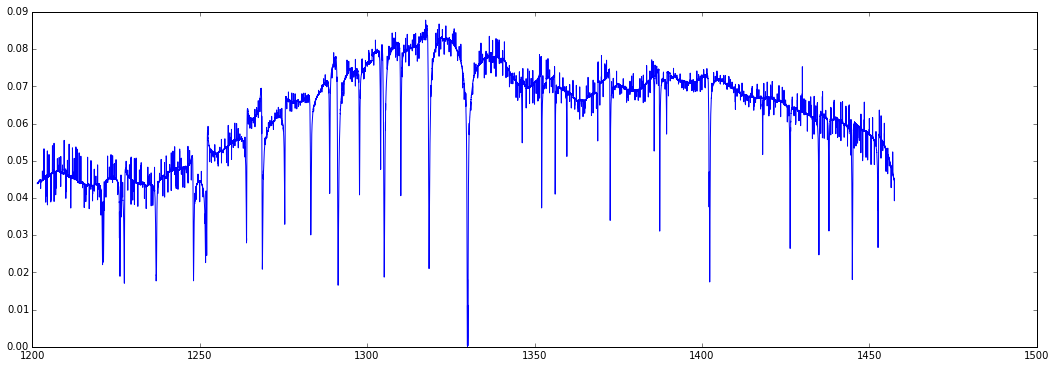

In [6]:
''' This cell is just reducing noise'''

plot(freq,np.abs(raw_data))     # If plot as it is, it is too noisy ; try it and see
data = raw_data.copy()          # The next 3 steps is systematically reducing noise.        
#data[::32] = np.nan            # Every 32nd element, start from 0th ;'nan' = not_a_number  # Glenn's original
#data[2::32] = np.nan           # Every 32nd element, start from 2nd                        # Glenn's original
#data[30::32] = np.nan          # Every 32nd element, start from 30th                       # Glenn's original

freq = freq[np.isfinite(data)] # Means that the elements is NOT not_a_number ie, it is a number 
data = data[np.isfinite(data)] # Drops No. of elements from 32768 to 29696
print 'length of data', len(data)

(-40, -20)

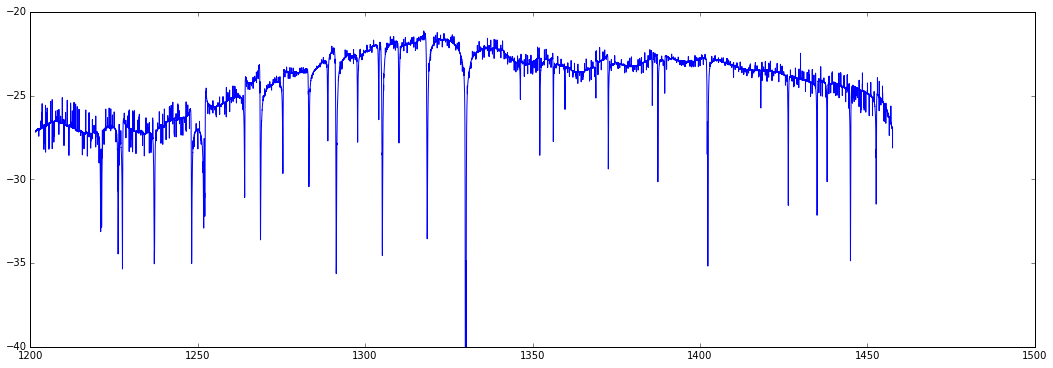

In [7]:

plot(freq,20*np.log10(np.abs(data)))# Base 10 is being used to magnify the small invariant of complex number
ylim(-40,-20)                       # It's the absolute of the complex no. (invariant) that is read

In [8]:
def find_resonators(freqs,data,max_res=50,min_spacing=0.5):
    order = np.argsort(data)                                # This just sorts data of complex numbers for you, and spit
                                                            # out that sorted, new position of the set
    resonators = np.zeros((max_res,))                       # This creates an array of 50 zeros
    next_index = 0
    for k,this_freq in enumerate(freqs[order]):             # This just goes through the list of freq with the  
                                                            # the new, sorted position of the set "order" 
        if np.abs(resonators-this_freq).min() >= min_spacing: # It is just finding the first 50 lowest point from the
            print "found one",next_index,this_freq            # Vertical axis, as long as its corresponding Horizontal 
                                                              # axis is at least 0.5 away from the next/previous Horizon
                                                              # entry --> This just gets rid of systemic errors.
            resonators[next_index] = this_freq              # The next 2 lines just sets up n=n+1
            next_index +=1
            if next_index >= max_res:                       # Caps it at 50 
                break
    return resonators

In [9]:
resonators = find_resonators(freq,20*np.log10(np.abs(data))) # Find resonators within range of the data observed.


found one 0 1329.9921875
found one 1 1291.328125
found one 2 1227.484375
found one 3 1402.328125
found one 4 1236.984375
found one 5 1248.1484375
found one 6 1444.921875
found one 7 1305.1015625
found one 8 1226.171875
found one 9 1268.703125
found one 10 1318.4921875
found one 11 1220.9765625
found one 12 1251.75
found one 13 1434.9453125
found one 14 1426.3515625
found one 15 1452.6015625
found one 16 1263.9765625
found one 17 1283.171875
found one 18 1387.3984375
found one 19 1437.9453125
found one 20 1275.3984375
found one 21 1372.59375
found one 22 1221.5
found one 23 1216.984375
found one 24 1234.0
found one 25 1211.484375
found one 26 1352.125
found one 27 1215.5
found one 28 1231.515625
found one 29 1235.5
found one 30 1204.515625
found one 31 1230.5
found one 32 1229.484375
found one 33 1236.0
found one 34 1204.015625
found one 35 1205.515625
found one 36 1250.0
found one 37 1206.5
found one 38 1217.984375
found one 39 1457.484375
found one 40 1230.0
found one 41 1219.484375
f

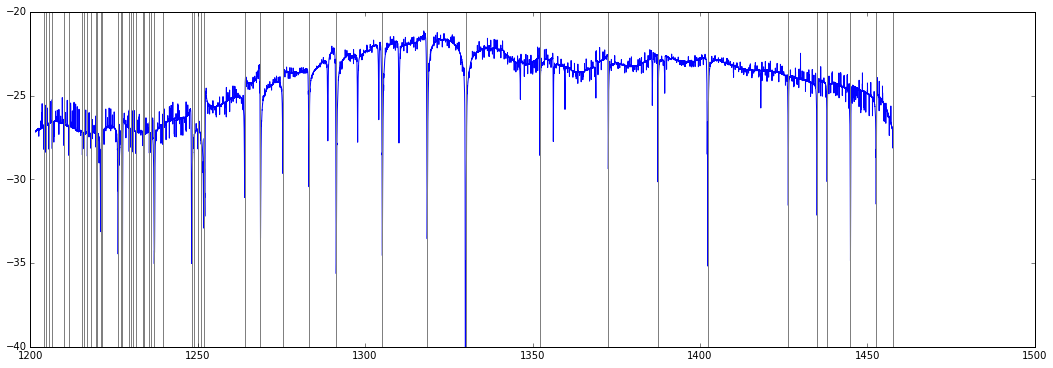

In [10]:
plot(freq,20*np.log10(np.abs(data)))
ylim(-40,-20)
ax = gca()
for res in resonators:                                       # Where there is resonance,
    ax.axvline(res,color='gray')                             # This just draws that veritical grey line for you

In [11]:
'''Definitions by AstroTze'''
import numpy as np

'''This gives you two maximas away from the minima, which is Champ'''
def give_me_2_maximas(champ,y,m,noise,tol):
    away = m + noise
    temp_champ = champ                           
    hl = 0                             
    hr = 0                             
    while y[temp_champ ] <= y[temp_champ - tol*away] and temp_champ !=0:            
        temp_champ = temp_champ - 1                        
        hl = hl +1                   
    temp_champ = champ                          
    while y[temp_champ] <= y[temp_champ + tol*away] and temp_champ != len(y)-tol*away:            
        temp_champ = temp_champ + 1                        
        hr = hr +1
    return hl,hr

'''This gives you two points above 2 Full Width Half Max, counting from Minima to Maxima'''
def give_me_2_half_maxes(champ,y,H_FWHM): 
    j = champ                    
    xl = 0                       
    xr = 0                       
    while y[j] < H_FWHM:         
        j = j-1                  
        xl = xl + 1               
    j = champ                    
    while y[j] < H_FWHM:         
        j = j+1                  
        xr = xr + 1               
    return xl,xr

'''This gives you the all important gamma'''
def give_me_gamma(x,Champ,XL,XR):
    gam1 = abs(abs(x[Champ - XL]) - abs(x[Champ]))
    gam2 = abs(abs(x[Champ + XR]) - abs(x[Champ]))
    gamma=(gam1 + gam2)/2
    return gamma

'''This is it ! This returns the difference between an idealized, and a measured y. This is used for chi-square'''   
def residuals(p,y_ideal, x_ideal):  
    err = y_meas - neg_Lorentz(x_ideal,p)                 # y_meas - y_ideal
    return err 

'''This returns the Lorentzian function'''
def neg_Lorentz(x, p):                                    #returns the negative lorentzian 
    Numerator = p[2]                                      #p[0] = Commonly considered as 'x0' ie the centre of x  
    Denominator = ((x - p[0])**2 + p[2])                  #p[1] = (gamma*np.pi) 
    Co_eff = 1/p[1]                                       #p[2] = gamma**2 
    Background = p[3]                                     #p[3] =  Commonly considered as 'y0' ie the background
    return (-1 * Co_eff * (Numerator/Denominator)) + Background
 
'''This code returns will return the average gradient to the right side of the curve'''   
def right_gradient_average(x,y,center,m,away):
    dx = np. gradient(x[center + m : center + away])
    right_gradient = np.gradient(y[center + m: center + away],dx)
    right_gradient_ave = np.average(right_gradient)
    return right_gradient_ave 

'''This code returns will return the average gradient to the left side of the curve''' 
def left_gradient_average(x,y,center,m,away):
    dx = np. gradient(x[center - away : center - m])
    left_gradient = np.gradient(y[center - away : center - m],dx)
    left_gradient_ave = np.average(left_gradient)
    return left_gradient_ave
    
'''This returns ALL the local minimums'''
def Minima(x, y, m, noise,flat):                           # m points before and after the minimum
    locmins = []
    away = m + noise
    for center in range(away, len(y) - (away)):            # noiseth point after m is checked
        left_min = 0
        right_min = 0 
        for j in range(m):                                                 
            if y[center-j] <= -1* abs(y[center - (j+noise)] + y[center - (j+(noise-1))]) / 2 and y[center] <= y[center-1]:   
                left_min = left_min + 1   
            if y[center+j] <= -1* abs(y[center + (j+noise)] + y[center + (j+(noise-1))]) / 2 and y[center] <= y[center+1]:
                right_min = right_min + 1 
        
        right_gradient_ave = right_gradient_average(x,y,center,m,away)
        left_gradient_ave = left_gradient_average(x,y,center,m,away)
        
        if left_min + right_min == 2*m:
            if left_gradient_ave < 0 and right_gradient_ave > 0:
                if left_gradient_ave < -1*flat and right_gradient_ave > flat:
                    locmins.append([ x[center], y[center] ])
    return locmins                                   # Returns set of all local minimas

'''This removes any local minimums that are the same and next to each other (rare by possible)'''
def remove_repeated(locmins):
    for i in range(1,len(locmins)):
        if locmins[i][1] == locmins[i-1][1]:        # The second index [1] is the y-axis!
            locmins[i][0]=0
            locmins[i][1]=0 
    while [0,0] in locmins: locmins.remove([0,0])
    return locmins

'''This code ranks the local minimums for you, according to indexes in y '''
def rank_the_locmins(locmins,y):
    for i in range(len(y)):                         # This block of code sorts locmins into their position
        for j in range (len(locmins)):
            if y[i] == locmins[j][1]:
                if len(locmins[j])==2:              # This just prevents repeated points from picking up
                    locmins[j].append(i)
    return locmins

'''This will sort out the locmins and remove any minimas which are too close'''
def remove_close_by_mins(locmins,m,noise):
    for i in range(1,len( locmins)):
        after = locmins[i][2]
        before = locmins[i-1][2]
        diff = abs(after - before)
        away = m + noise
        if diff < away :
            y_after = locmins[i]
            y_before = locmins[i-1]
            if y_after < y_before :
                locmins[i-1] = [0,0,0]
            if y_after > y_before :
                locmins[i] = [0,0,0]
    while [0,0,0] in locmins: locmins.remove([0,0,0])
    return locmins


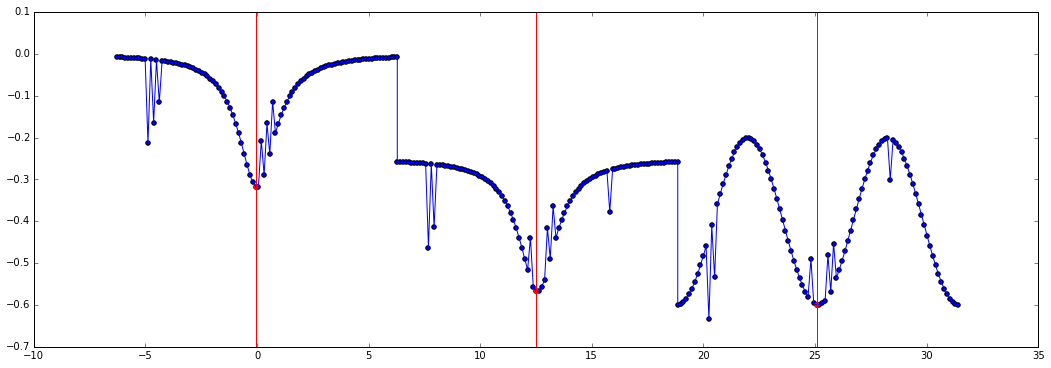

In [16]:
'''Test cell on an idealized function by AstroTze ... NOT IMPORTANT...JUST A TEST'''
import numpy as np       
######################################## The first Lorentzian
gamma = 1
p=[0.0, 0.0, 0.0, 0.0]
p[0] = 0.0                                
p[1] = (gamma * np.pi)
p[2] = gamma**2
p[3] = 0.0
x = np.linspace(p[0]-2*np.pi, p[0]+2*np.pi, 100)
y = neg_Lorentz(x, p)

y[51]=y[51]+0.1                             # NOISE 
y[53]=y[53]+0.1                             # NOISE
y[55]=y[55]+0.1                             # NOISE
y[11]=y[11]-0.2                             # NOISE
y[13]=y[13]-0.15                            # NOISE
y[15]=y[15]-0.1                             # NOISE

a = x
b = y
######################################## The second Lorentzian

p=[0.0, 0.0, 0.0, 0.0]
p[0] = 4 * np.pi                                                 
p[1] = (gamma*np.pi)
p[2] = gamma**2
p[3] = -0.25                            
g = np.linspace(p[0] - 2*np.pi, p[0] + 2*np.pi, 100)
h = neg_Lorentz(g,p) 

h[47] = h[47] + 0.1                         # NOISE 
h[53] = h[53] + 0.1                         # NOISE
h[55] = h[55] + 0.1                         # NOISE
h[11] = h[11] - 0.2                         # NOISE
h[13] = h[13] - 0.15                        # NOISE
h[75] = h[75] - 0.1                         # NOISE

######################################## The third cosine wave
r = np.linspace(6*np.pi, 10*np.pi, 100)
s = -0.2 * np.cos(x)-0.3 - 0.1

s[47] = s[47] + 0.1                         # NOISE 
s[53] = s[53] + 0.1                         # NOISE
s[55] = s[55] + 0.1                         # NOISE
s[11] = s[11] - 0.2                         # NOISE
s[13] = s[13] - 0.15                        # NOISE
s[75] = s[75] - 0.1                         # NOISE

####################################### The combined plot points
x = np.concatenate((x,g,r))
y = np.concatenate((y,h,s))

'''3 plots out the three lowest points, and let's fit them, by Astro Tze...NOT IMPORTANT...JUST A TEST'''
m = 5                                       # m is how many points to the left/right you check
noise = 7                                   # noise is how many points after 'm' that you want to check 
flat = 0.1                                  # flat is the gradient of the points around the centre 
locmins = Minima(x,y,m,noise,flat)         
remove_repeated(locmins)                   
#locmins = rank_the_locmins(locmins,y)
#locmins = remove_close_by_mins(locmins,m,noise)

plot(x, y)
scatter(x, y)
ax = gca()
for i in range(len(locmins)):
    ax.axvline(locmins[i][0], color = 'red')
    scatter (locmins[i][0], locmins[i][1], color = 'red') 

length of data 32768
There are 36 resonators, and they occur at ...'
... these frequencies & data numbers
1 1220.9765625 		-33.1219951956
2 1221.25 		-32.8532786777
3 1226.171875 		-34.4539471071
4 1227.46875 		-34.2255308117
5 1236.9609375 		-34.9767043493
6 1248.1484375 		-35.0230008177
7 1251.75 		-32.9079550993
8 1252.0859375 		-32.1999891693
9 1263.9765625 		-31.0803250273
10 1268.703125 		-33.6111148132
11 1275.3984375 		-29.6476439313
12 1283.171875 		-30.4361533103
13 1288.8203125 		-27.6973588984
14 1291.328125 		-35.6302226431
15 1297.7265625 		-27.7788344157
16 1304.0390625 		-26.4336752332
17 1305.1015625 		-34.5468471503
18 1310.0625 		-27.8254459921
19 1318.4921875 		-33.5482191418
20 1346.328125 		-25.2203384846
21 1352.125 		-28.5604651254
22 1356.1640625 		-27.7355898259
23 1359.65625 		-25.8192480918
24 1368.8828125 		-25.1404558801
25 1372.59375 		-29.3762206551
26 1385.734375 		-25.5779921556
27 1387.3984375 		-30.1442885274
28 1389.4453125 		-24.8547588908
29 1402.

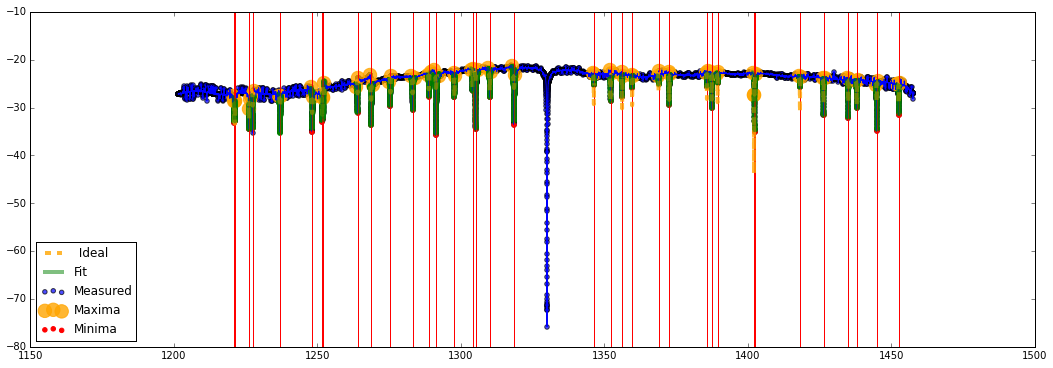

In [13]:
'''Test cell of actual data by AstroTze, This reads the local minimums... close approximation for resonators'''
import scipy
m = 16400                                            # Set to 2200 for first two peaks  // Set to 0 for min
n = 16500                                            # Set to 2340 for first two peaks  // Set to 29696 for max
m = 0                                             # Set to 2370 for first two peaks // Set to 0 for min
n = 32768                                             # Set to 2610 for first two peaks // Set to 32768 for max 
a = freq[m:n]
b = data[m:n]
x = a
y = 20 * np.log10(np.abs(b))

flat = 1.2                                            # flat is the gradient of the points around centre
m = 5                                                 # m is the number of points to the left or right of centre
noise = 5                                             # noise is how many points away from 'm' you want to measure
tol = 1                                               # tolerance will determine the spread of lorentz function

locmins = Minima(x, y, m, noise,flat)                 
remove_repeated(locmins)                              
locmins = rank_the_locmins(locmins,y)   
locmins = remove_close_by_mins(locmins,m,noise)

#print locmins
print 'length of data',len(data)
print "There are",len(locmins),"resonators, and they occur at ...'"
print "... these frequencies & data numbers"
for i in range(len(locmins)):
    print i+1, locmins[i][0],'\t','\t', locmins [i][1]

plot(x, y)
scatter(x, y, alpha = 0.7, label = "Measured")
ylim=(-40, -20)
ax = gca()                                              
for i in range(len(locmins)):
    ax.axvline(locmins[i][0], color = 'red')         
    scatter (locmins[i][0], locmins[i][1], color = 'red')    
#savefig('Resonant_Plot.pdf')

###################################################### This block of code finds you the lorentz fitted function
print "And these are the chisquare of those points" 
count_chi=0
count_chi_less_than_1=0
for j in range(len(locmins)):
    champ = locmins[j][2]
            
    HL,HR =  give_me_2_maximas(champ,y,m,noise,tol)               # This block of code finds you gamma     
    FWFM = abs (x[champ + HR] - x[champ - HL])
    H_FWFM = abs (y[champ + HR] - y[champ])
    H_FWHM = (abs(y[champ]) - 0.5 * H_FWFM) * -1
    XL, XR = give_me_2_half_maxes(champ,y,H_FWHM)
    gamma = give_me_gamma(x,champ,XL,XR)
    
    p=[0.0, 0.0, 0.0, 0.0]                            
    p[0] = x[champ]                                             
    p[1] = (gamma * np.pi)
    p[2] = gamma**2
    p[3] = y[champ + HR]
    #print j+1,p, "The original parameters"  
    
    x_ideal = np.linspace(x[champ - HL], x[champ + HR], HL+HR)                 # x_ideal = x_meas
    y_ideal = neg_Lorentz(x_ideal,p)
    y_meas = y[champ-HL : champ+HR]
    x_meas = x_ideal
    
    scatter(x[champ - HL], y[champ - HL], color = 'orange', s=180 , alpha = 0.8 )
    scatter(x[champ + HR], y[champ + HR], color = 'orange', s=180 , alpha = 0.8)
    plot(x_ideal, y_ideal, color = 'orange', linewidth = 4, linestyle = '--', alpha = 0.8 )                                       
    
    from scipy.optimize import leastsq
    plsq = leastsq(residuals, p, args=(y_meas,x_meas))      
    #print j+1,(plsq[0]), "The parameters for leastsq"   
    
    x_fit = x_ideal                                                           # x_fit = x_ideal = x_meas
    y_fit = neg_Lorentz(x_ideal,plsq[0])
    plot(x_fit, y_fit, color = 'green', linewidth = 4 , alpha = 0.5 )
    scatter(x_fit, y_fit, color = 'green', alpha = 0.5 )
    
    
    chi_squared=0
    for item in range(len(y_meas)):
        element = (y_meas[item]-y_fit[item])**2
        chi_squared = chi_squared + element
    print j+1, "Chi_squared is", chi_squared
    if chi_squared > 100:
        count_chi = count_chi +1
    if chi_squared < 1:
        count_chi_less_than_1=count_chi_less_than_1 +1
        
        

print "The number of fits with Chi_square more than 100 is", count_chi 
print "The number of fits with Chi_square less than 1 is", count_chi_less_than_1 
    
######################################################################## Everything below is just for labelling !!!
scatter(x[champ - HL], y[champ - HL], color = 'orange', s=180 , alpha = 0.8, label = "Maxima" )    
scatter (locmins[j][0], locmins[j][1], color = 'red', label = "Minima")    
plot(x_ideal, y_ideal, color = 'orange', linewidth = 4, linestyle = '--', alpha = 0.8 , label = " Ideal" )
plot(x_fit, y_fit, color = 'green', linewidth = 4 , alpha = 0.5 , label = "Fit" )
legend(loc=3)

In [14]:
unwrapped = data*np.exp(-31.3j*2*np.pi*(freq))  # unwrapped is a set of complex numbers. It takes real numbers (freq) 
                                                # times with complex numbers (data) to produce another 

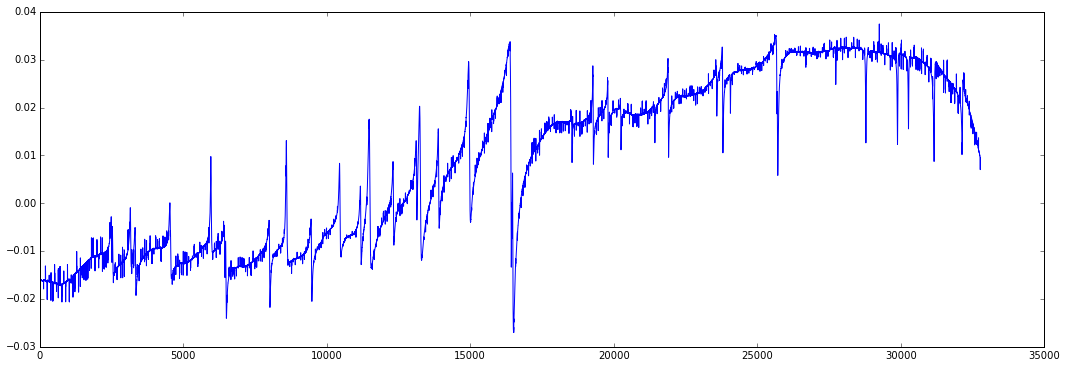

In [15]:
plot(np.angle(unwrapped+2))                     # np. angle just tells you the angle made tween real & imaginary no.
                                                # 
